In [175]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
%matplotlib inline

In [176]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(URL,sep = '\t')


In [177]:
Attribute = ["символизация",
             "нормализованные потери",
             "марка",
             "вид топлива",
             "стремление",
             "количество дверей",
             "тип кузова",
             "ведущий мост",
             "расположение двигателя",
             "колесная база",
             "длина",
             "ширина",
             "высота",
             "снаряженная масса",
             "тип двигателя",
             "количество цилиндров",
             "объем двигателя",
             "топливная система",
             "диаметр отверстия",
             "ход",
             "степень сжатия",
             "мощность двигателя",
             "пиковые обороты",
             "городской режим",
             "шоссейный режим",
             "цена"
            ]

In [178]:
df = pd.read_csv(URL,names = Attribute)
df['символизация'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: символизация, dtype: int64

In [179]:
count_zero = (df == 0).sum().sum()
count_zero_s = (df['символизация'] == 0).sum().sum()
count_na = df.isna().sum().sum()
print("Число нулевых эл-тов в таблице : %f\nЧисло нулевых эл-тов в символизации %f\nЧисло пропущенных значений в таблице: %f" % (count_zero,count_zero_s,count_na))

Число нулевых эл-тов в таблице : 67.000000
Число нулевых эл-тов в символизации 67.000000
Число пропущенных значений в таблице: 0.000000


### Все нули в столбце, который может принимать нули

In [180]:
n= df.shape
df = df.drop_duplicates()
print("Размерность таблицы до удаления дубликатов: (%d, %d)\nРазмерность таблицы после удаления: (%d, %d)"%(n[0],n[1],df.shape[0],df.shape[1]))

Размерность таблицы до удаления дубликатов: (205, 26)
Размерность таблицы после удаления: (205, 26)


In [181]:
print("Названия и типы столбцов: \n%s" % df.dtypes)

Названия и типы столбцов: 
символизация                int64
нормализованные потери     object
марка                      object
вид топлива                object
стремление                 object
количество дверей          object
тип кузова                 object
ведущий мост               object
расположение двигателя     object
колесная база             float64
длина                     float64
ширина                    float64
высота                    float64
снаряженная масса           int64
тип двигателя              object
количество цилиндров       object
объем двигателя             int64
топливная система          object
диаметр отверстия          object
ход                        object
степень сжатия            float64
мощность двигателя         object
пиковые обороты            object
городской режим             int64
шоссейный режим             int64
цена                       object
dtype: object


In [182]:
df.describe()

,символизация,колесная база,длина,ширина,высота,снаряженная масса,объем двигателя,степень сжатия,городской режим,шоссейный режим
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Число непропущенных значений в стоблце(count) совпадает с числом строк => возможно пропуски обозначены как-то иначе.Посмотрим на уникальные значения столбцов.

In [183]:
for c in df.columns:
    print("%s : %s"%(c,df[c].unique()))

символизация : [ 3  1  2  0 -1 -2]
нормализованные потери : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
марка : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
вид топлива : ['gas' 'diesel']
стремление : ['std' 'turbo']
количество дверей : ['two' 'four' '?']
тип кузова : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
ведущий мост : ['rwd' 'fwd' '4wd']
расположение двигателя : ['front' 'rear']
колесная база : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6 

### В некоторых столбцах содержатся "?" - они и есть пропуски.

### Посмотрим на процентаж пропусков в каждом стоблце, где они есть

In [184]:

missed = (df == '?').sum()
percentage = missed / df.shape[0]
nan_cols=percentage[percentage != 0].index
percentage = percentage[percentage != 0]
percentage

нормализованные потери    0.200000
количество дверей         0.009756
диаметр отверстия         0.019512
ход                       0.019512
мощность двигателя        0.009756
пиковые обороты           0.009756
цена                      0.019512
dtype: float64

### Пятая часть всех значений в нормализованных потерях - прпоуски. Если удалить все строки с пропусками в нормальных потерях, то это сильно отразится на объеме датасета  и сильно исказит данные.

In [185]:

df1 = df.copy(deep = True)
col_nan_without_norm_less = nan_cols[1:]
col_nan_without_norm_less
for c in col_nan_without_norm_less:
    df1.loc[df1[c] == '?',c] = np.nan
df1 = df1.dropna()
del_pers = df1.shape[0]/df.shape[0]
df.loc[df['нормализованные потери'] == '?','нормализованные потери'] = np.nan
df['нормализованные потери'] = df['нормализованные потери'].astype(float)
1 -del_pers

0.05853658536585371

### Было удалено всего 5 процентов занчений от всего датасета.Это допустимое значение.Перейдем к обработке столбца "нормализованные потери" .А именно заменим все пропуски на медианное зн-е.

In [186]:
df1.loc[df1['нормализованные потери'] == '?','нормализованные потери'] = np.nan
df1 = df1.fillna(df1['нормализованные потери'].median())
df1['нормализованные потери'] = df1['нормализованные потери'].astype(float)
df1['цена'] = df1['цена'].astype(float)
df1.describe()

,символизация,нормализованные потери,колесная база,длина,ширина,высота,снаряженная масса,объем двигателя,степень сжатия,городской режим,шоссейный режим,цена
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,119.699482,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565,13285.025907
std,1.235582,32.489788,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000,7738.000000
50%,1.000000,113.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000,16515.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


## Исследуем наши данные на выбросы.
### Рассмотрим несколько способов работы с выбросами:
### 1)Метод межквартильного размаха (IQR): Этот метод основан на интерквартильном размахе, который определяется разницей между 75-м и 25-м процентилями данных. Значения, находящиеся за пределами (Q1 - 1.5 * IQR) и (Q3 + 1.5 * IQR), считаются выбросами и могут быть удалены,где IQR = Q3 - Q1
### 2)Замена выбросов на границы интервала: Значения, находящиеся за пределами определенного интервала, могут быть заменены на соответствующие значения границы интервала. Например, все значения, меньшие чем нижняя граница, могут быть заменены на нижнюю границу, а значения, большие чем верхняя граница, могут быть заменены на верхнюю границу.
### 3)Метод доверительных интервалов:
1. Получить выборку данных, в которой находятся выбросы.
2. Вычислить среднее значение и стандартное отклонение выборки.
3. Определить доверительный интервал для среднего значения выборки при выбранном уровне доверия.
4. Исключить из выборки данные, которые находятся вне доверительного интервала.

In [187]:
import scipy.stats as stats
def remove_outliers(dataset, column_name):
    df1 = dataset.copy(deep = True)
    mean = df1[column_name].mean()
    std = df1[column_name].std()
    threshold = 3 * std
    
    df1 = df1[(df1[column_name] > mean - threshold) & (df1[column_name] < mean + threshold)]
    
    return df1
# Метод доверительных интервалов.
def trust_intervals(data = df):
    df1 = data.copy(deep = True)
    not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
    # Задаем уровень доверия (обычно 95)
    confidence = 0.999
    for c in not_object_col:
        mean = data[c].mean()
        std_dev = data[c].std()
        # Вычисляем доверительный интервал
        interval = stats.norm.interval(confidence,loc = mean,scale = std_dev)
        # Исключаем из выборки данные, выходящие за интервал
        # interval[1] - верхняя граница, interval[0] - нижняя граница интервала.
        df1 = df1[(df1[c] >= interval[0])&(df1[c] <= interval[1])]
    return df1
# Метод межквантильного размаха.
def IQR(data = df):
    df1 = data.copy(deep = True)
    not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
    for c in not_object_col:
        dc = data[c].describe()
        # Первый квартиль
        q1 = float(dc['25%'])
        # Третий квартиль
        q3 = float(dc['75%'])
        # Интерквартильный размах
        iqr = q3 - q1
        # Удаляем все значения выходящие за Q1 - 1.5 * IQR и Q3 + 1.5 * IQR
        df1 = df1[(df1[c] >= q1 - 1.5 * iqr) & (df1[c] <= q3 + 1.5 * iqr)]
    return df1
# Метод замены на граничные значения.Границы задаются как Q1 - 1.5 * IQR и Q3 + 1.5 * IQR.
def border(data = df):
    df1 = data.copy(deep = True)
    not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
    for c in not_object_col:
        dc = data[c].describe()
        # Первый квартиль
        q1 = dc['25%']
        # Третий квартиль
        q3 = dc['75%']
        # Интерквартильный размах
        iqr = q3 - q1
        df1[df1[c] < q1 - 1.5*iqr] = dc['50%']
        df1[df1[c] > q3 + 1.5*iqr] = dc['50%']
    return df1
    
    
def plott(name,data = df):
    mean = data[name].mean()
    mode = data[name].mode()[0]
    median = data[name].median()
    skewness = data[name].skew()
    excess = data[name].kurtosis()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # Создание двух подграфиков
    # Построение гистограммы на верхнем подграфике
    sns.distplot(data[name], ax=ax1)
    ax1.axvline(mean, ls="-", color="r", label="Среднее")
    ax1.axvline(median, ls="-", color="g", label="Медиана")
    ax1.axvline(mode, ls="-", color="indigo", label="Мода")
    plt.text(1.1, 2.1, f'Коэффициент асимметрии: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 2, f'Эксцесс: {excess:.2f}',transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 1.9, f'Среднее значение: {mean:.2f}', transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 1.8, f'Мода: {mode:.2f}',transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 1.7, f'Медана: {median:.2f}',transform=plt.gca().transAxes, fontsize=12, va='top')
    ax1.legend()

    # Создание боксплота на нижнем подграфике
    ax2.boxplot(data[name], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightgrey'))


    

## Z- нормировка и minmax нормировка
### Z-нормализация : В этом методе значения переменных масштабируются таким образом, чтобы среднее значение было равно 0, а стандартное отклонение было равно 1. Формула для z-нормализации:$z = \frac{{x - \mu}}{{\sigma}}$, где x - значение переменной, $\mu$ - среднее значение, $\sigma$ - стандартное отклонение.

### - Min-max нормализация: В этом методе значения переменных масштабируются таким образом, чтобы они находились в заданном диапазоне, обычно от 0 до 1. Формула для min-max нормализации:$x_{\text{norm}} = \frac{{x - x_{\text{min}}}}{{x_{\text{max}} - x_{\text{min}}}}$, где x - значение переменной, $x_{\text{min}}$ - минимальное значение, $x_{\text{max}}$ - максимальное значение.

### Выбор между этими методами зависит от задачи и характера данных. Z-нормализация обычно предпочтительна, если данные имеют нормальное распределение или ее приближение, а min-max нормализация может быть более предпочтительной, если важна сохранение относительного порядка исходных значений.

### Мы будем использовать z - нормировку, так как мы стремимся к нормализации наших столбцов.

In [188]:
def z_norm(data = df):
    not_obj = [c for c in data.columns if data[c].dtype != 'object']
    df2 = data.copy(deep = True)
    df2[not_obj] = (df2[not_obj] - df2[not_obj].mean())/df2[not_obj].std()
    print(df2)
    return df2
def minimax_norm(data = df):
    not_obj = [c for c in data.columns if data[c].dtype != 'object']
    df2 = data.copy(deep = True)
    df2[not_obj] = (df2[not_obj] - df2[not_obj].min())/(df2[not_obj].max() - df2[not_obj].min())
    return df2

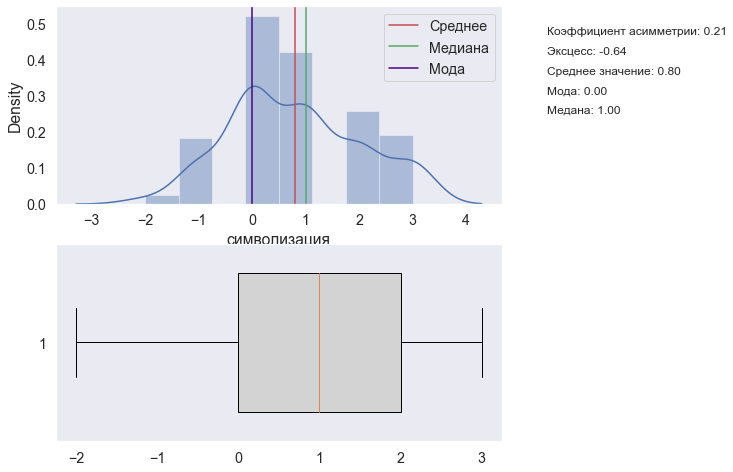

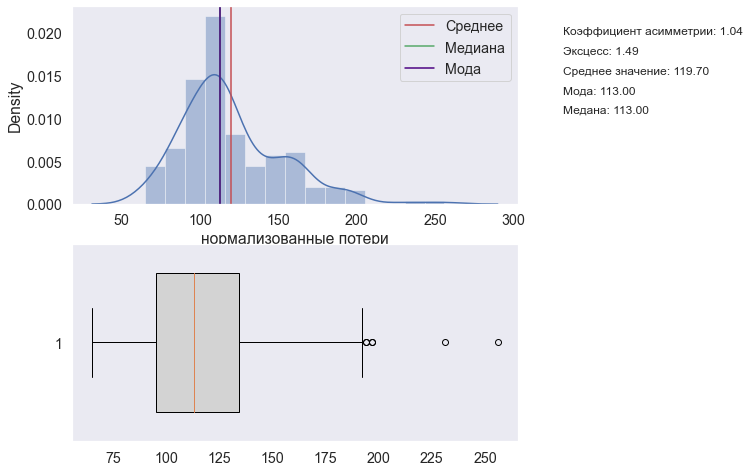

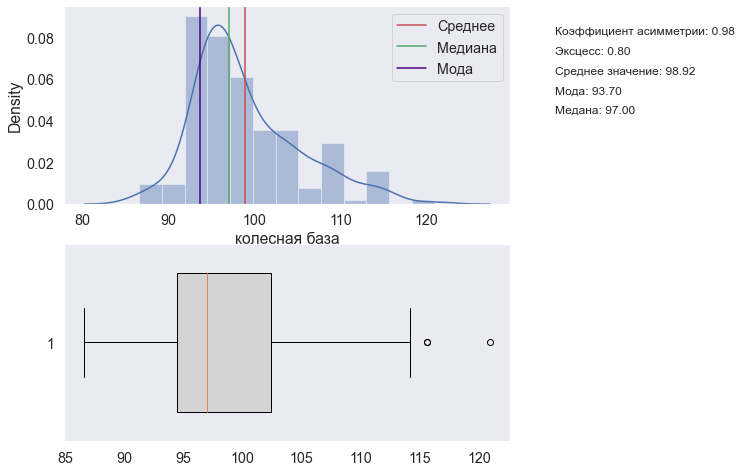

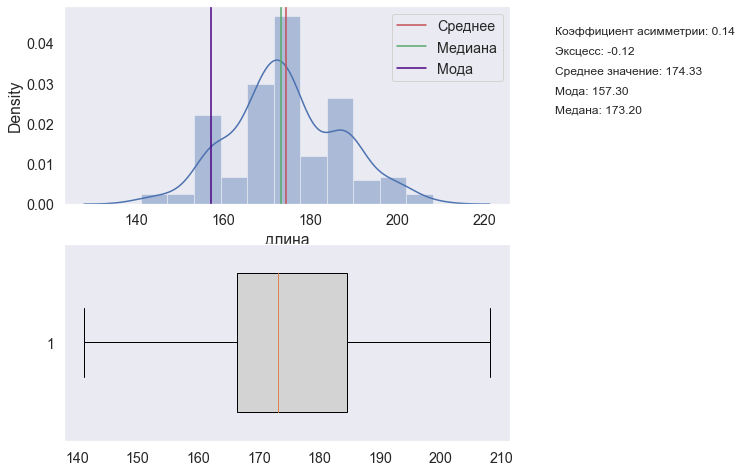

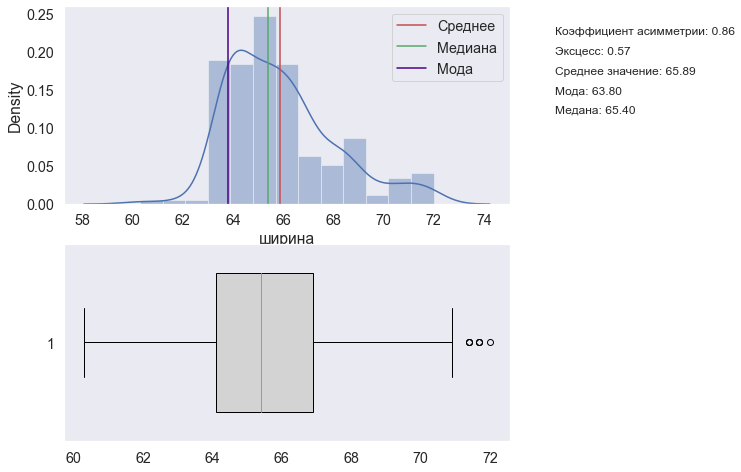

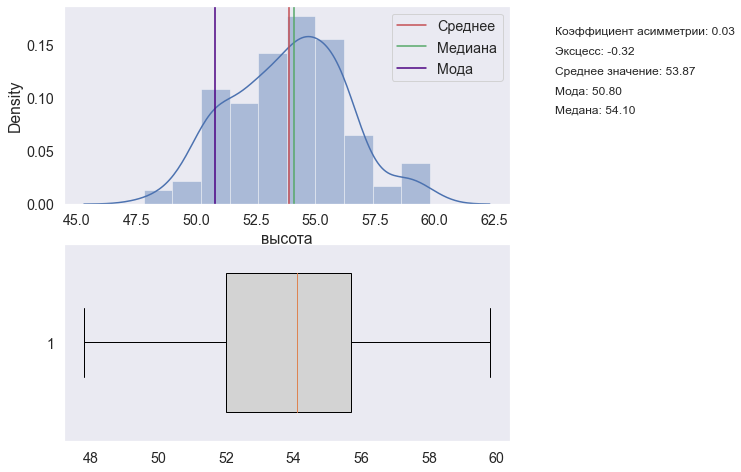

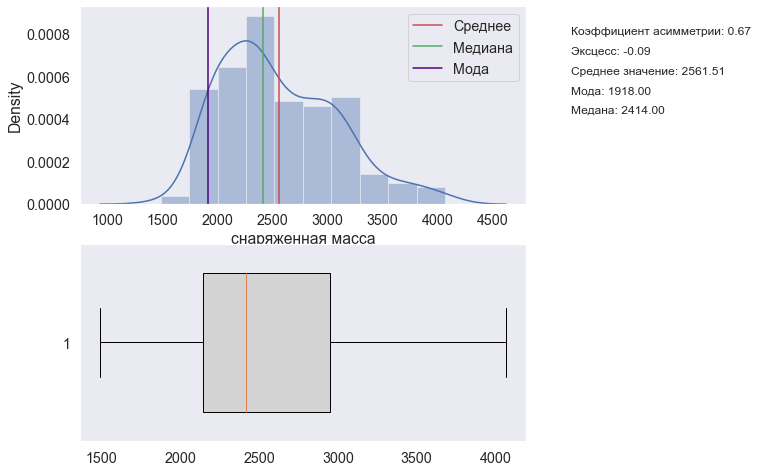

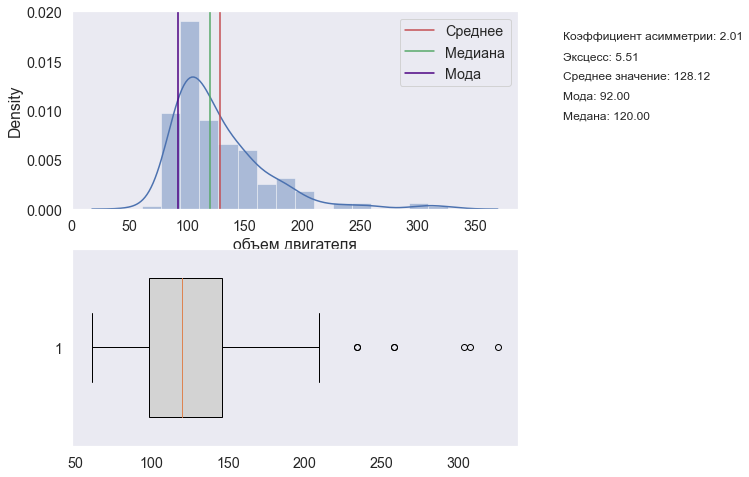

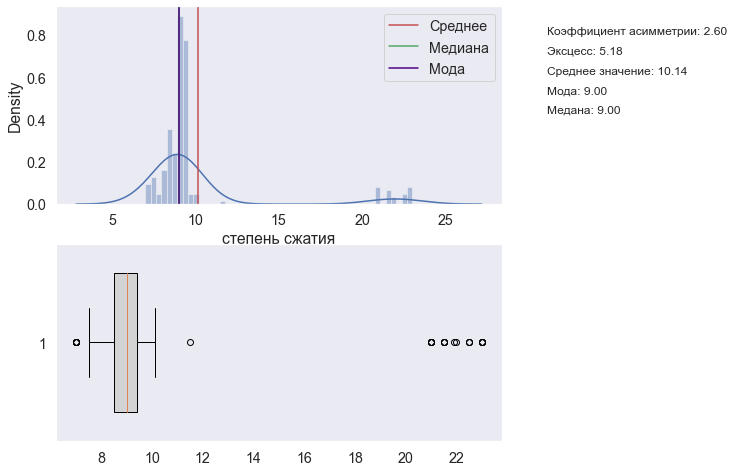

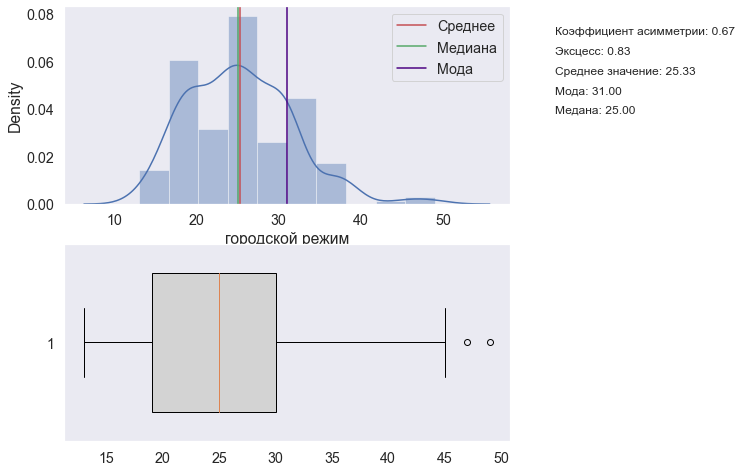

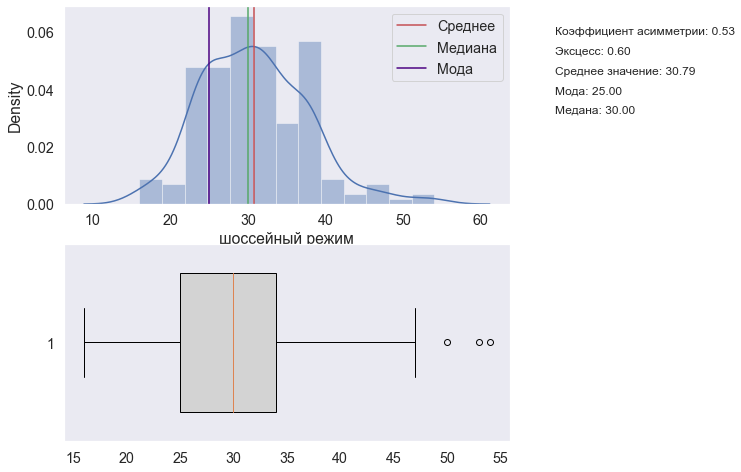

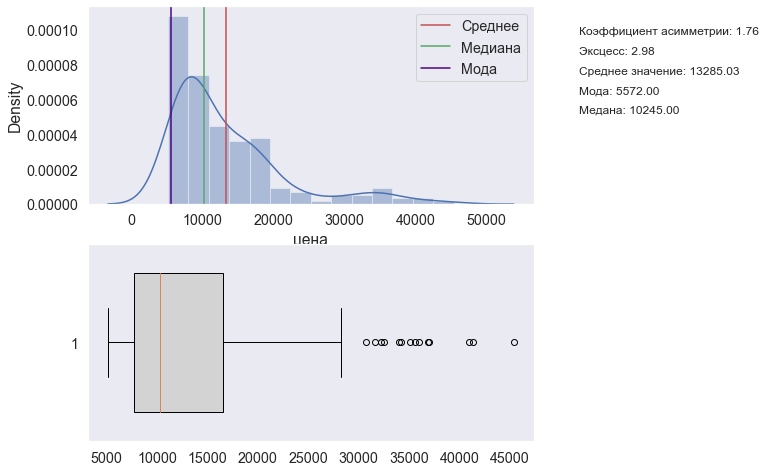

In [189]:
import warnings
warnings.filterwarnings("ignore")
not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
df1[not_object_col].apply(np.log)
for c in not_object_col:
    plott(data = df1,name= c)


In [190]:
remove_outliers(df1, 'нормализованные потери').shape

(191, 26)

### Применим к данным метод межквартильного размаха.

(144, 26)


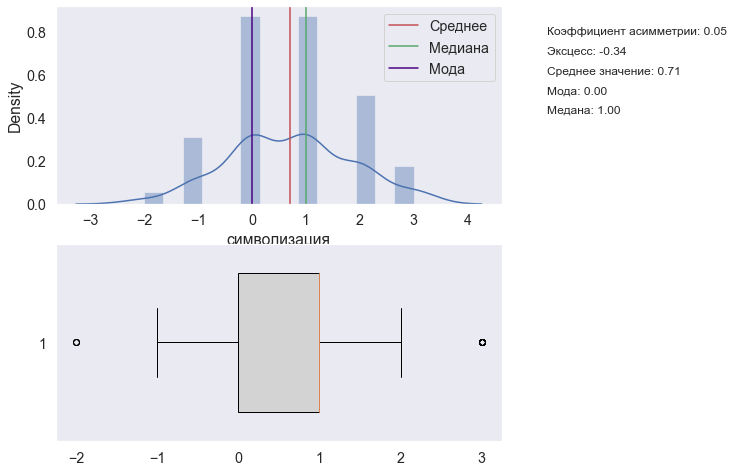

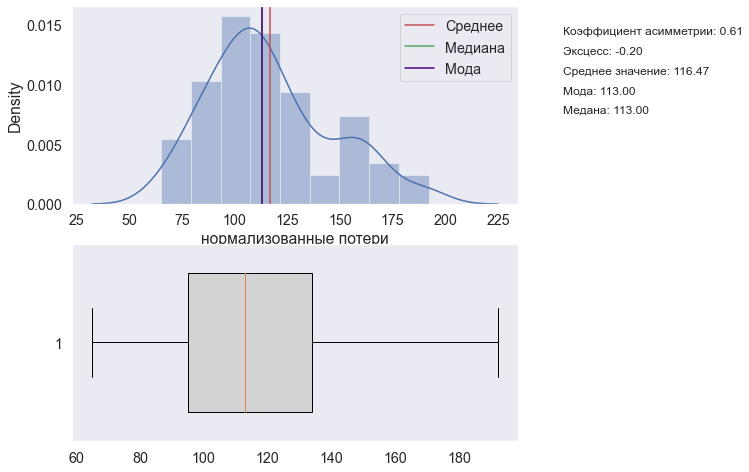

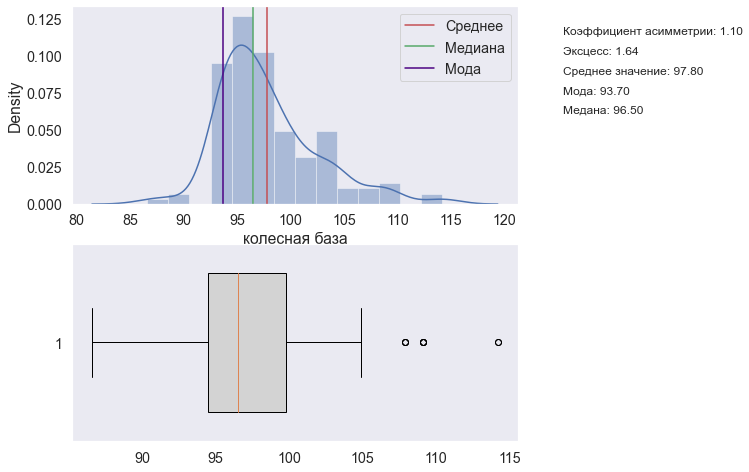

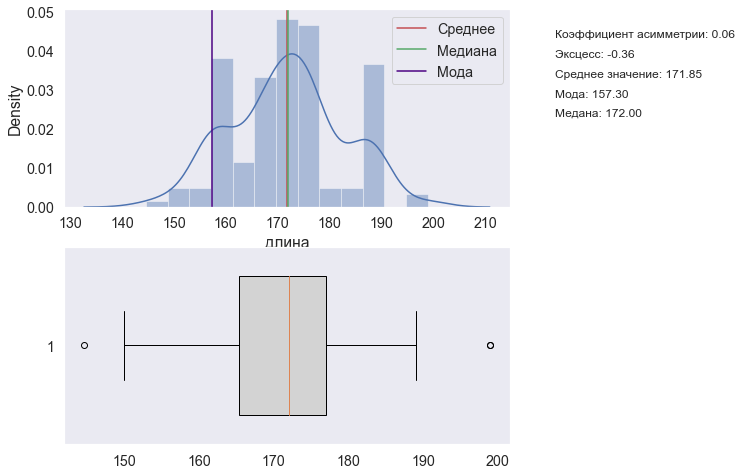

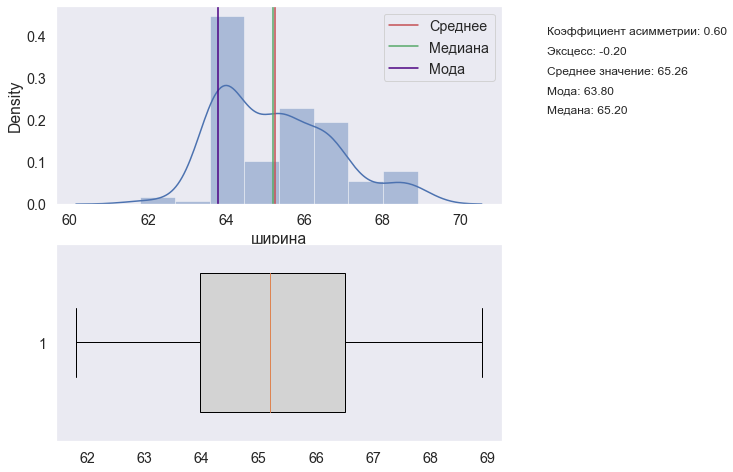

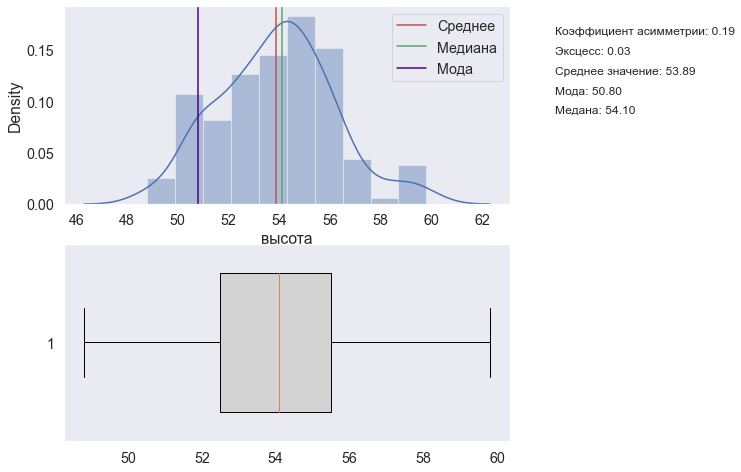

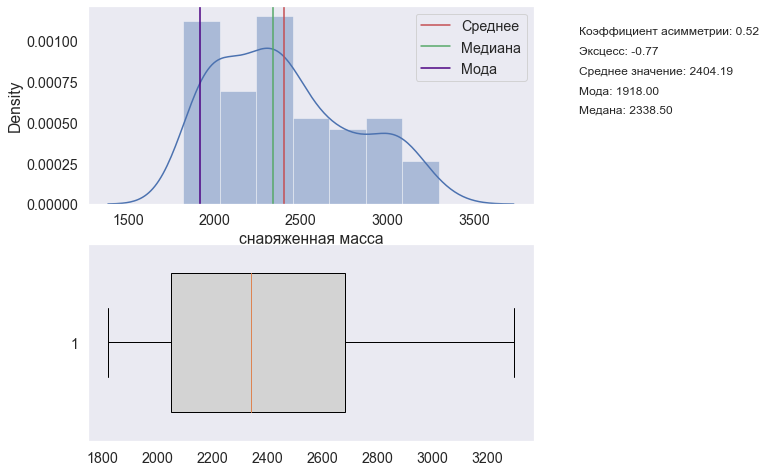

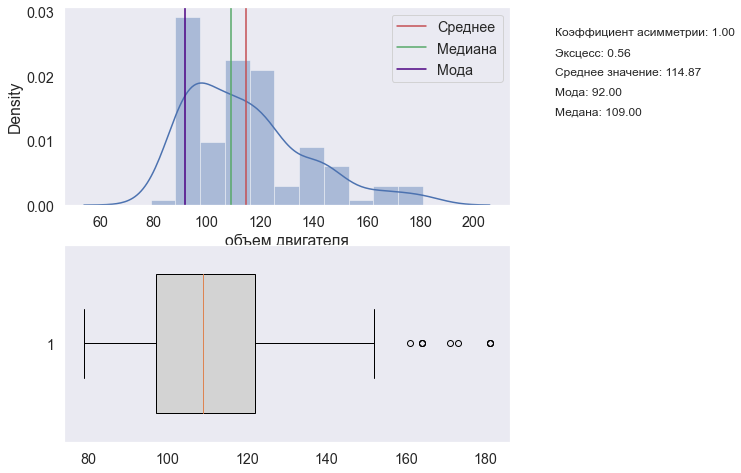

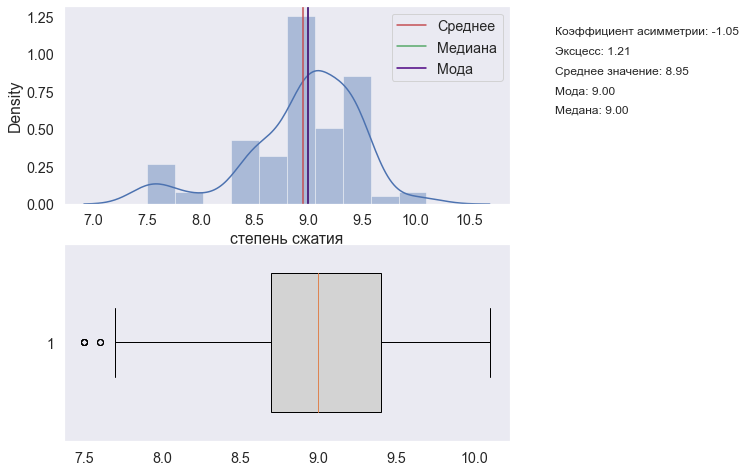

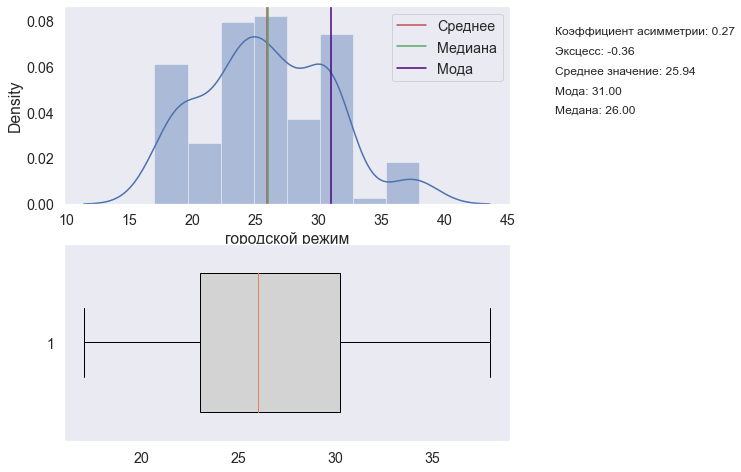

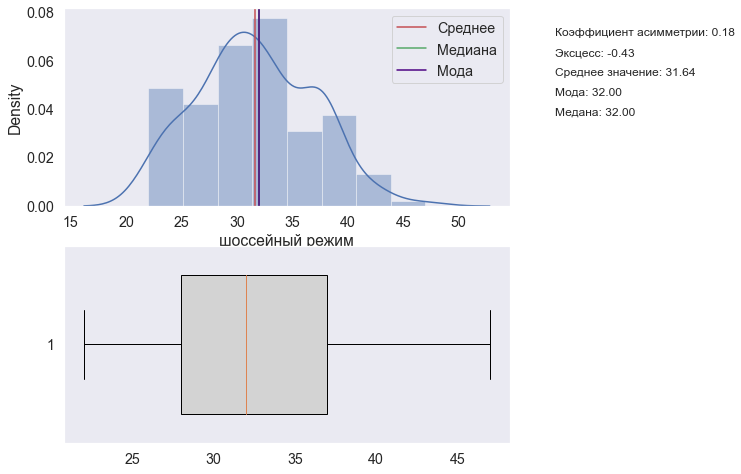

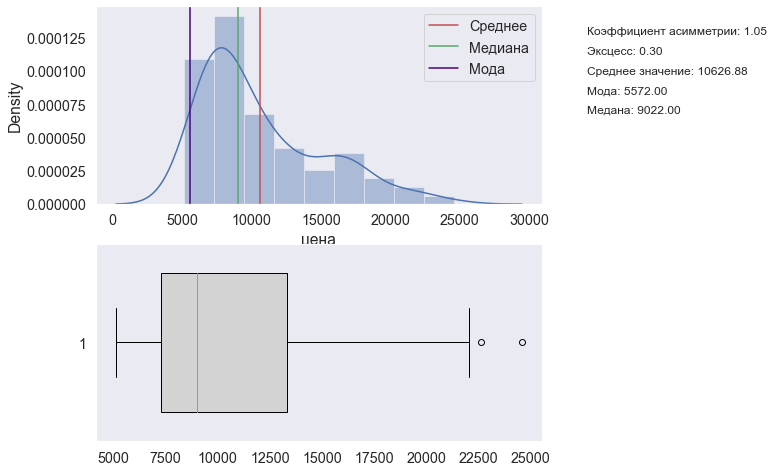

In [191]:
import warnings
warnings.filterwarnings("ignore")
not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
print(IQR(df1).shape)
for c in not_object_col:
    plott(data = IQR(df1),name = c)


### Применим метод замены выбросов на границы интервалов.(Q1 - 1.5 * IQR и Q3 + 1.5 * IQR)

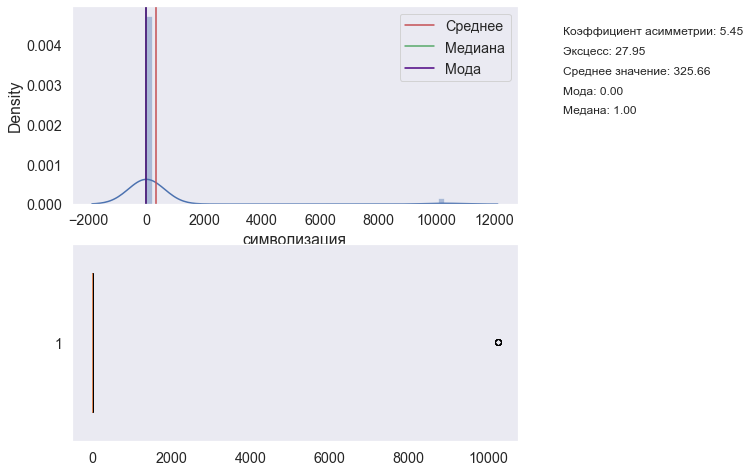

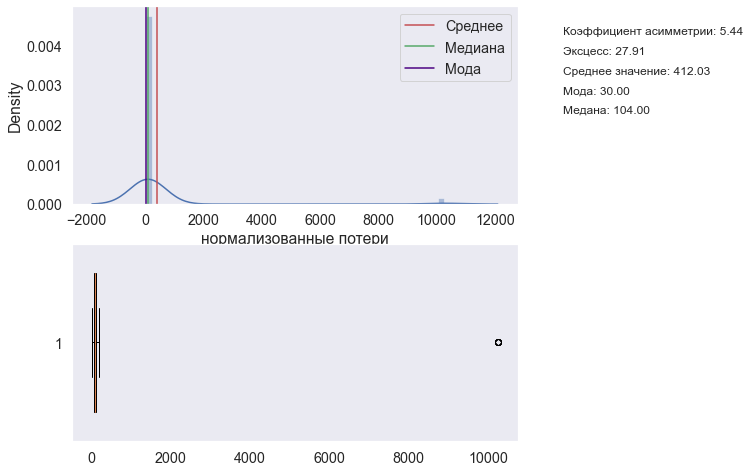

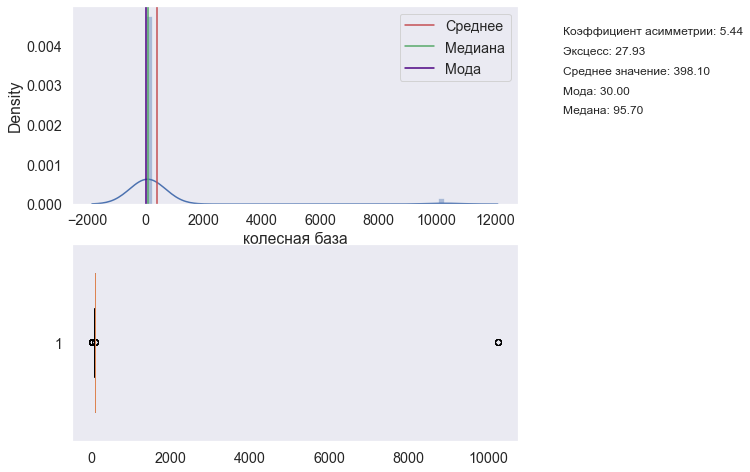

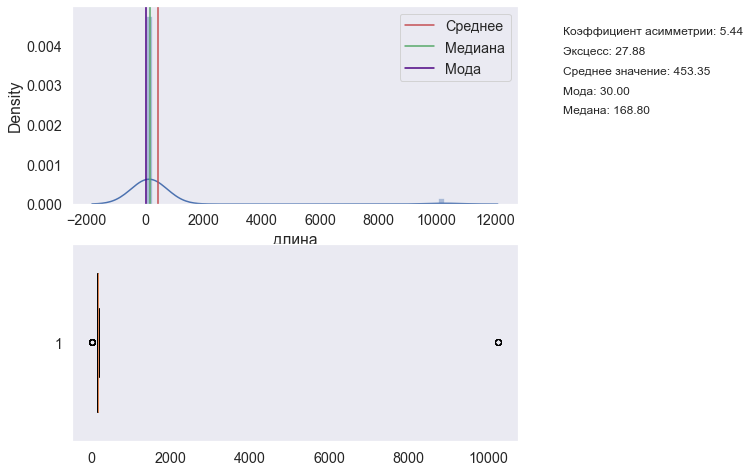

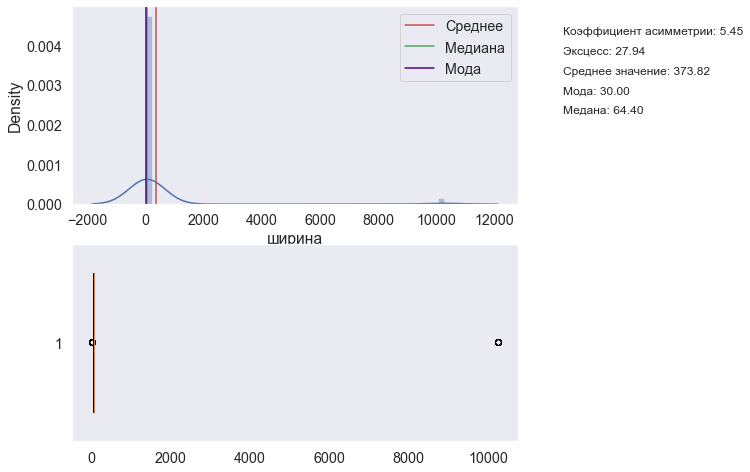

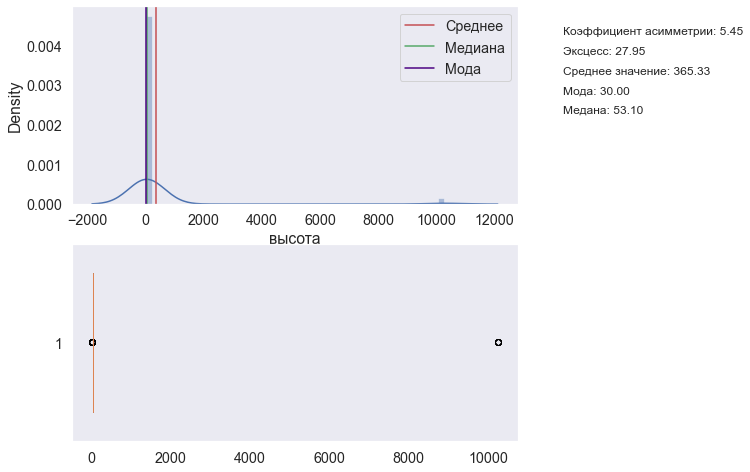

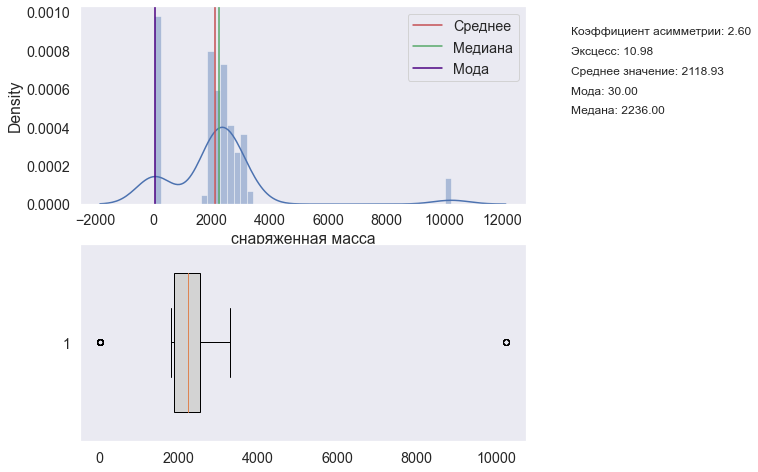

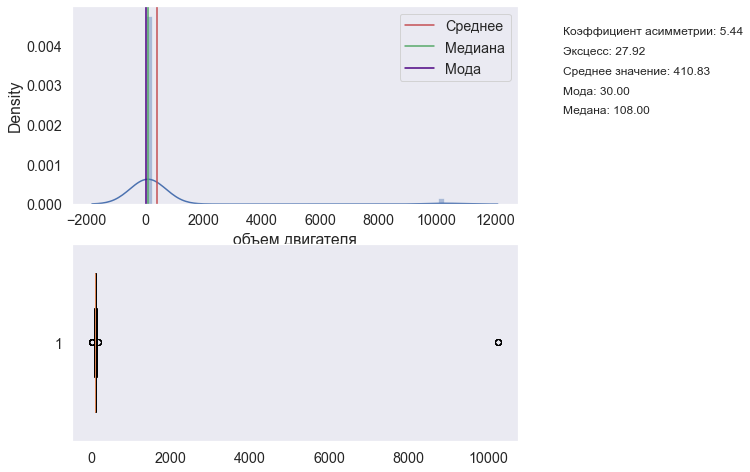

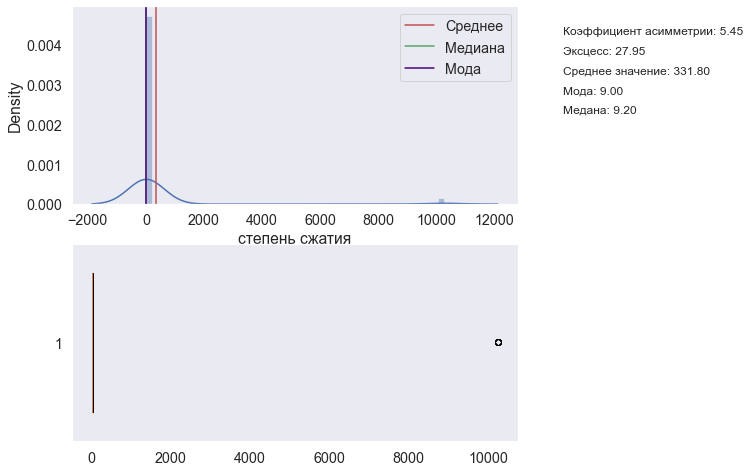

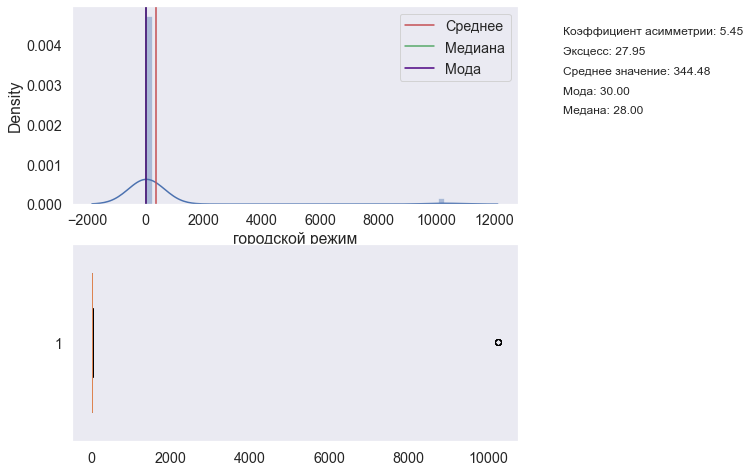

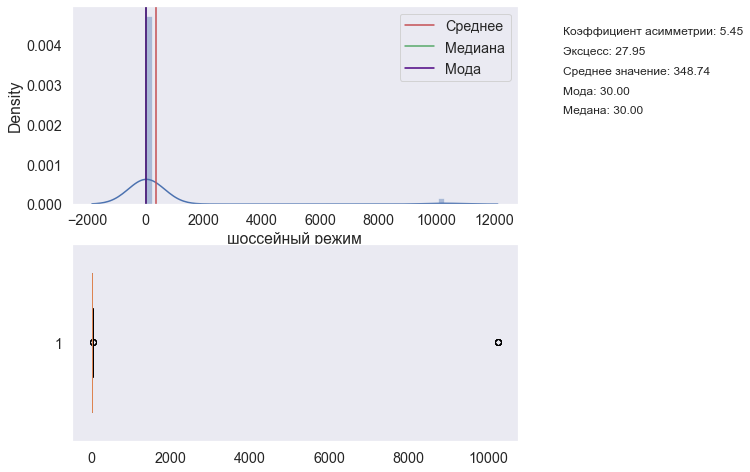

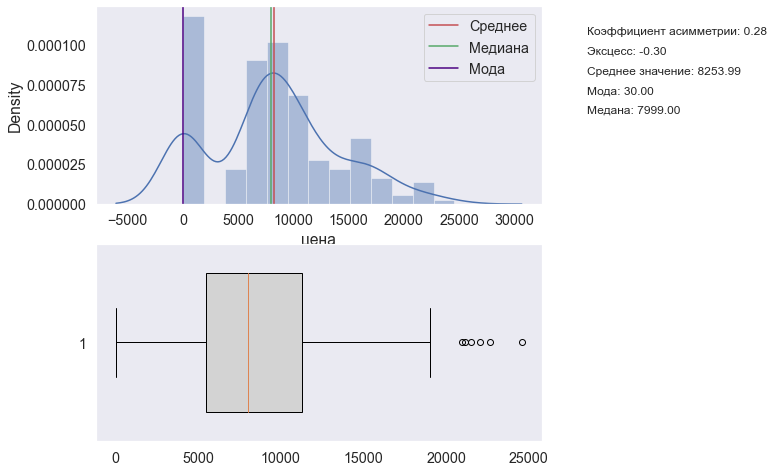

In [192]:
import warnings
warnings.filterwarnings("ignore")
for c in not_object_col:
    plott(data = border(df1),name = c)

### Как можно заметить данный метод сильно исказил данные.Это происходит из-за небольшого числа данных в датасете.Если данных мало, замена выбросов на границы интервала может привести к потере значимых наблюдений и искажению статистического анализа.


### Применим метод доверительных интервалов.


(185, 26)


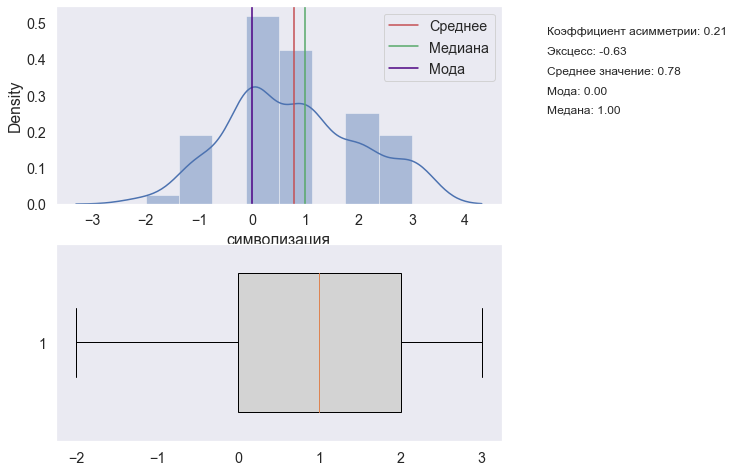

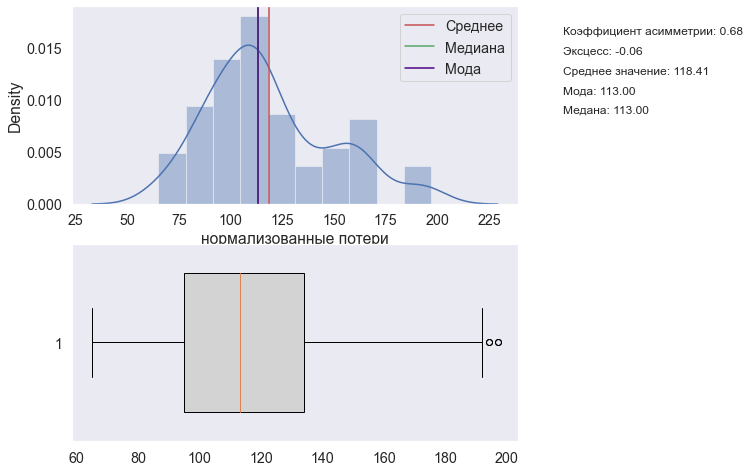

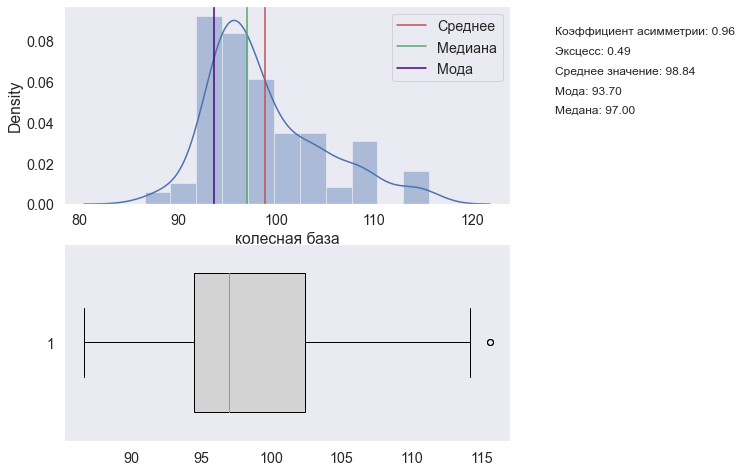

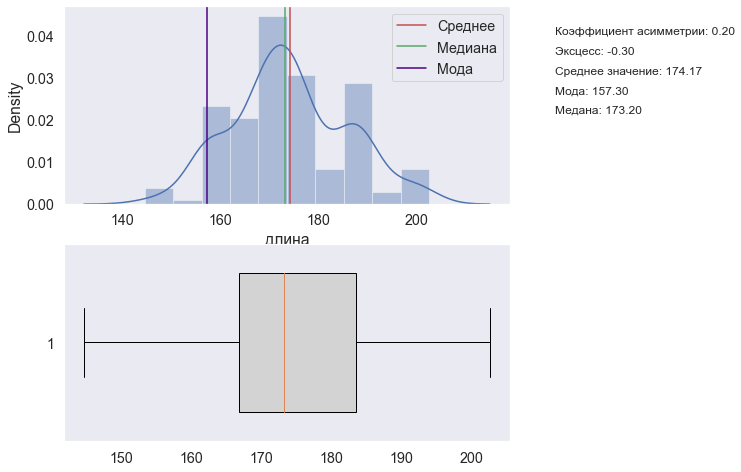

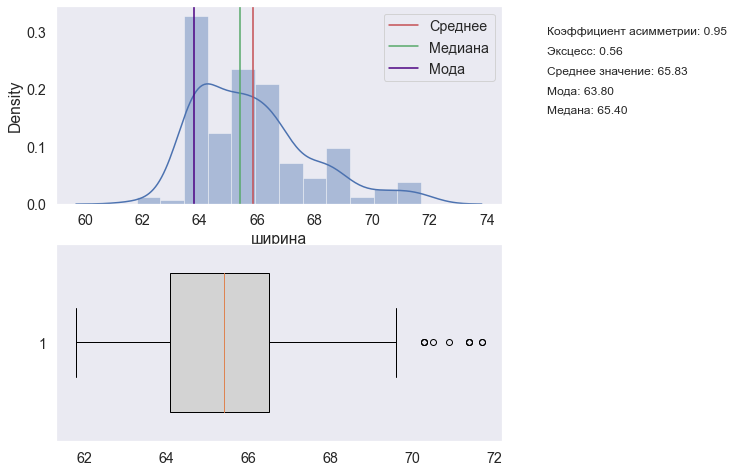

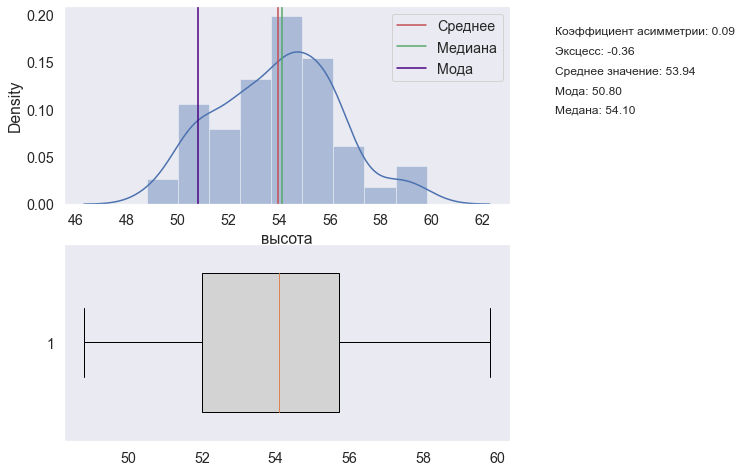

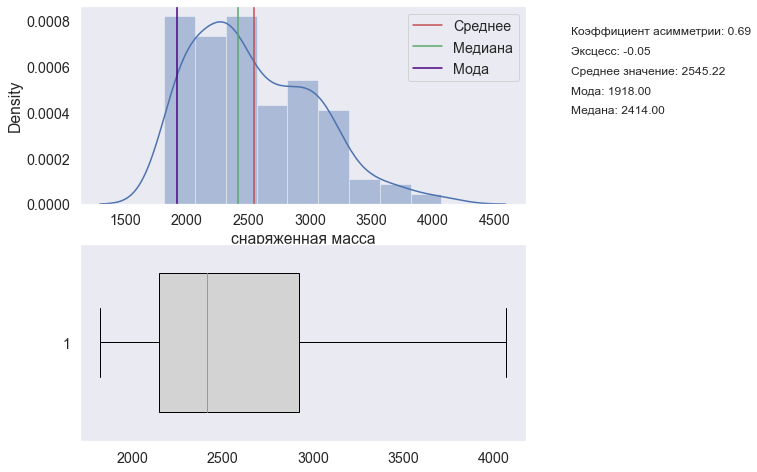

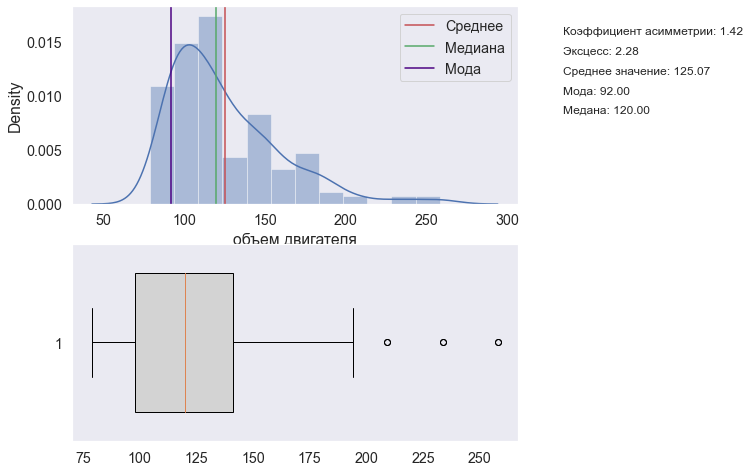

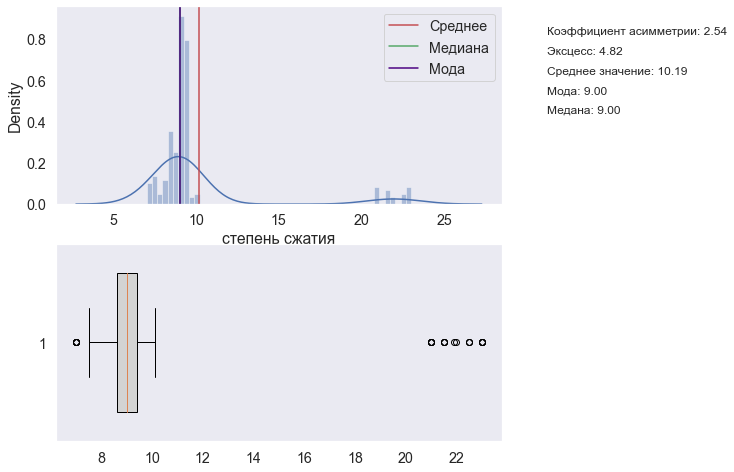

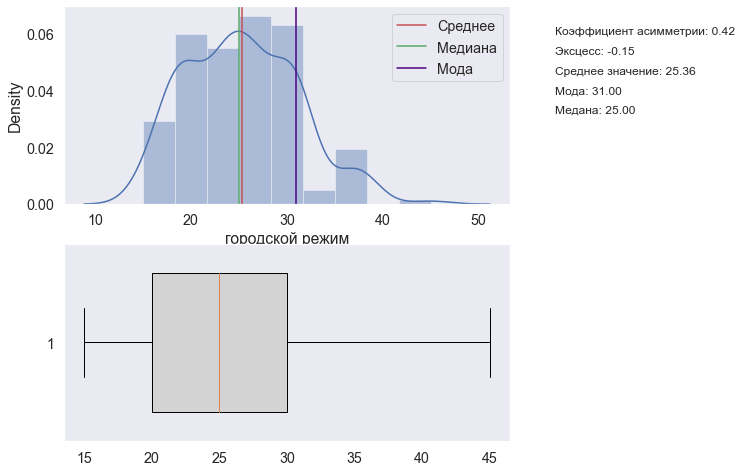

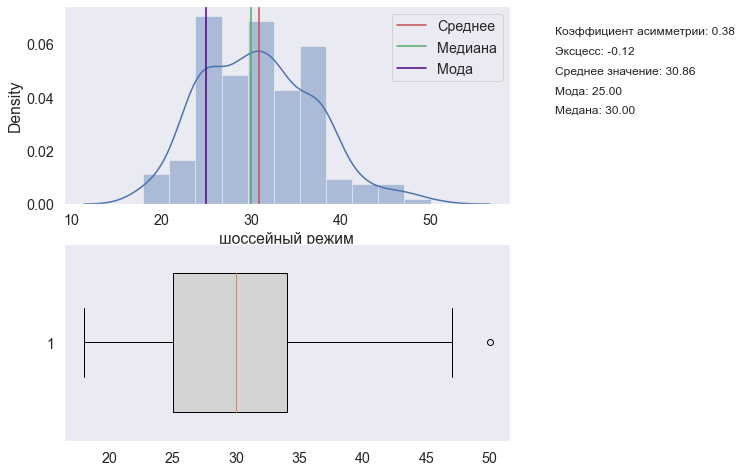

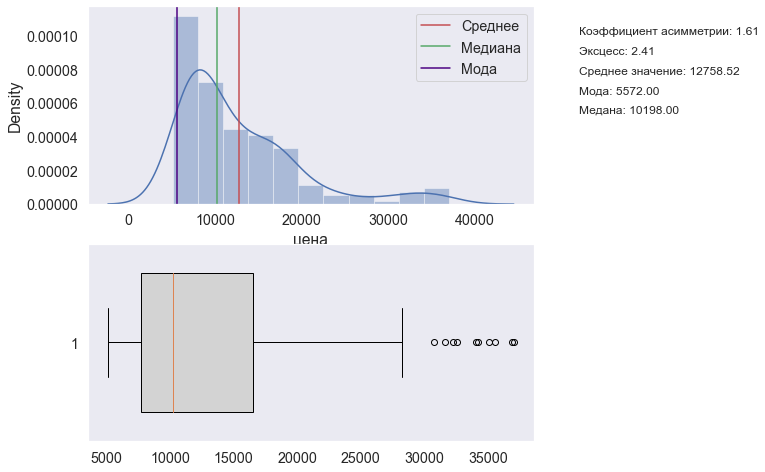

In [193]:
import warnings
warnings.filterwarnings("ignore")
print(trust_intervals(df1).shape)
for c in not_object_col:
    plott(data = trust_intervals(df1),name = c)

### Посомтрим как эти методы повляли на датасет. Через анализ асимметрии и эксцессов.

In [194]:
skewness = np.abs(df1[not_object_col].skew())
kurtosis = np.abs(df1[not_object_col].kurtosis())
skewness_IQR = np.abs(IQR(df1)[not_object_col].skew())
kurtosis_IQR = np.abs(IQR(df1)[not_object_col].kurtosis())
skewness_broad = np.abs(border(df1)[not_object_col].skew())
kurtosis_broad = np.abs(border(df1)[not_object_col].kurtosis())
skewness_trust_int = np.abs(trust_intervals(df1)[not_object_col].skew())
kurtosis_trust_int = np.abs(trust_intervals(df1)[not_object_col].kurtosis())
print('Рез-тат IQR метода:')
print('В %d колонках из 12 коэффциент асимметрии улучшился'%(skewness > skewness_IQR).sum())
print('В %d колонках из 12 коэффциент эксцесса улучшился'%(kurtosis > kurtosis_IQR).sum())
print()
print('Рез-тат метода замены выбросов на граничные значения:')
print('В %d колонках из 12 коэффциент асимметрии улучшился'%(skewness > skewness_broad).sum())
print('В %d колонках из 12 коэффциент эксцесса улучшился'%(kurtosis > kurtosis_broad).sum())
print()
print('Рез-тат метода доверительных интервалов:')
print('В %d колонках из 12 коэффциент асимметрии улучшился'%(skewness > skewness_trust_int).sum())
print('В %d колонках из 12 коэффциент эксцесса улучшился'%(kurtosis > kurtosis_trust_int).sum())
print()
print("Число удаленных эл-тов после IQR метода: %d" % (df1.shape[0]-IQR(df1).shape[0]))
print("Число удаленных эл-тов после метода доверительных интервалов: %d" % (df1.shape[0]-trust_intervals(df1).shape[0]))


Рез-тат IQR метода:
В 10 колонках из 12 коэффциент асимметрии улучшился
В 9 колонках из 12 коэффциент эксцесса улучшился

Рез-тат метода замены выбросов на граничные значения:
В 1 колонках из 12 коэффциент асимметрии улучшился
В 1 колонках из 12 коэффциент эксцесса улучшился

Рез-тат метода доверительных интервалов:
В 7 колонках из 12 коэффциент асимметрии улучшился
В 10 колонках из 12 коэффциент эксцесса улучшился

Число удаленных эл-тов после IQR метода: 49
Число удаленных эл-тов после метода доверительных интервалов: 8


### Качественный анализ результатов показывает, что эти методы примерно одинаково дейсвтую на этот датасет.Однако на графиках видно, что метод замены выбросов граничными значениями приводит к еще более сильным выбросам,при этом IQR метод удаляет больше значений из датасета, что влечет за собой большее искажение изначальных данных => для данного датасета лучшим методом будет метод доверительных интервалов.

In [195]:
def scaling_plot(name,color_,data = df2):
    plt.plot(df2[name], np.full(len(df2),i), ls="", marker="o", ms=10, color=color_, label=name)
    plt.axvline(df2[name].mean(), ls="--", color = color_ , label="mean of " + str(name))
    plt.legend()
    plt.show()

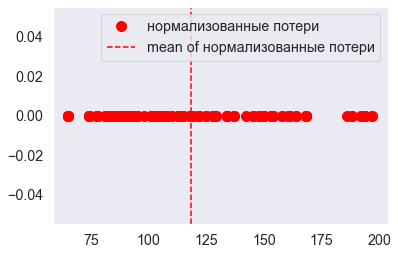

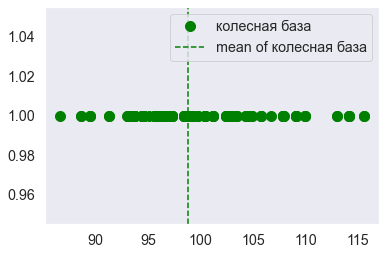

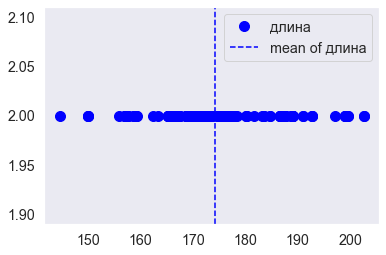

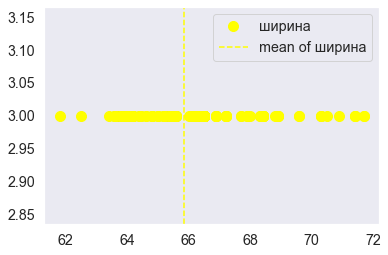

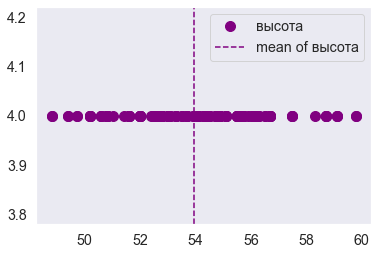

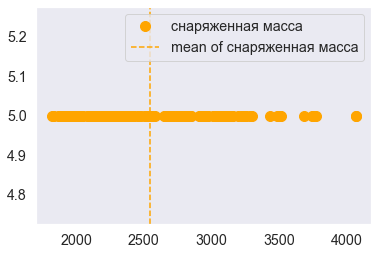

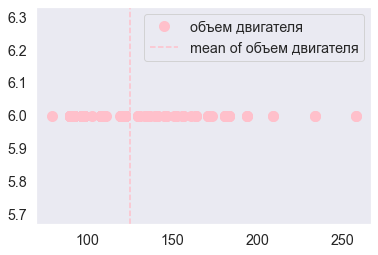

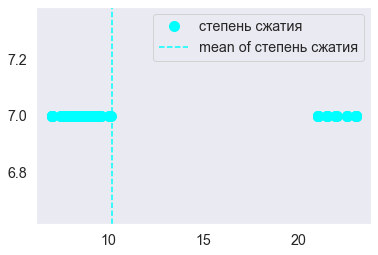

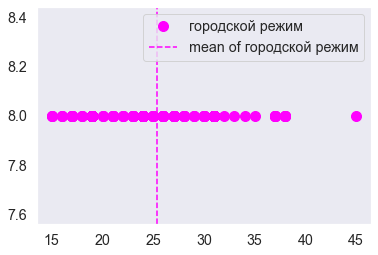

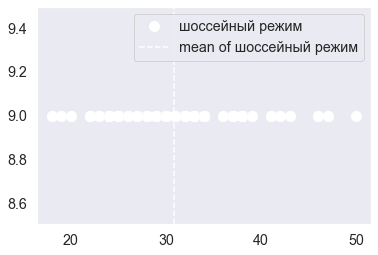

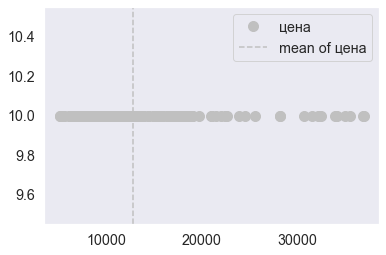

In [196]:
df2 = trust_intervals(df1).copy(deep = True)

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'white', 'silver', 'gold', 'brown', 'teal', 'lavender', 'indigo', 'turquoise', 'coral', 'maroon', 'lime']
i = 0
for c in not_object_col[1:]:
    scaling_plot(name = c,color_ = colors[i])
    i += 1


### нормальные потери(красный),длина(синий),ширина(желтый),выота(пурпурный),городской режим(фиолетовый) не сильно разбросан относительно среднего зн-я.Таким образом дисперсия этих величин будет не большой.
### колесная база(зеленый),снаряженная масса(оранжевый),объем двигателя(розовый),степень сжатия(голубой),цена(серый) разбросаны сильней относительно среднего значения.То есть дисперсия у этих величин будет больше чем у предыдущих.

In [197]:
df2.describe()

,символизация,нормализованные потери,колесная база,длина,ширина,высота,снаряженная масса,объем двигателя,степень сжатия,городской режим,шоссейный режим,цена
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.783784,118.405405,98.838919,174.174595,65.833514,53.936216,2545.216216,125.070270,10.192541,25.362162,30.864865,12758.518919
std,1.240948,30.477771,5.851263,11.742984,2.001022,2.354121,495.481789,33.978421,4.049111,5.835953,6.232637,7095.396920
min,-2.000000,65.000000,86.600000,144.600000,61.800000,48.800000,1819.000000,79.000000,7.000000,15.000000,18.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.800000,64.100000,52.000000,2145.000000,98.000000,8.600000,20.000000,25.000000,7738.000000
50%,1.000000,113.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000,10198.000000
75%,2.000000,134.000000,102.400000,183.500000,66.500000,55.700000,2921.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,197.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,45.000000,50.000000,37028.000000


In [198]:
df2.describe(include = 'object')


,марка,вид топлива,стремление,количество дверей,тип кузова,ведущий мост,расположение двигателя,тип двигателя,количество цилиндров,топливная система,диаметр отверстия,ход,мощность двигателя,пиковые обороты
count,185,185,185,185,185,185,185,185,185,185,185,185,185,185
unique,21,2,2,2,5,3,2,5,4,7,37,35,52,21
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,4800
freq,32,166,150,111,89,111,182,138,151,82,22,18,19,35


# Дальше тесты и анализ

In [199]:

#df3 = minimax_norm(df2)
from scipy.stats import shapiro
stat, p = shapiro(df2['объем двигателя'])
print(stat, p)
alpha = 0.05
if p > alpha:
	print('Образец имеет гауссово распределение (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = %.3f' % p)

0.866692304611206 1.0612334795656597e-11
Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = 0.000


**Тест д'Агостино на K^2**

In [200]:

from scipy.stats import normaltest
stat, p = normaltest(df2['высота'])
print(stat, p)
alpha = 0.05
if p > alpha:
	print('Образец имеет гауссово распределение (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = %.3f' % p)
    

1.4254577780897604 0.49030438392921705
Образец имеет гауссово распределение (принимаем гипотезу H0), p = 0.490


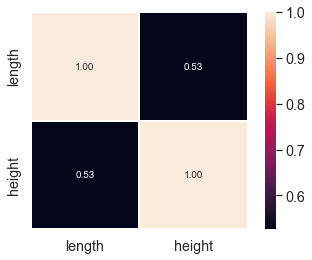

In [201]:
ax = sns.heatmap(X.corr(method = 'pearson'), vmax = 1, square = True, fmt = '.2f', annot = True, linecolor = 'white', linewidths = 0.05)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Создаем список столбцов для входных признаков (X)
col = ['длина', 'высота']
X = z_norm(df2[col])

# Создаем целевой столбец (y), преобразуя столбец "количество дверей" в числовой формат (0 или 1)
y = (df2['количество дверей'] == 'four').astype(int)

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем экземпляр модели логистической регрессии
model = LogisticRegression()

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

# Предсказываем значения целевого столбца для тестовой выборки
predictions = model.predict(X_test)

# Оцениваем производительность модели на тестовой выборке
#accuracy = (predictions == y_test).mean()
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

        длина    высота
0   -0.457686 -2.181797
1   -0.457686 -2.181797
2   -0.253308 -0.652565
3    0.206541  0.154531
4    0.206541  0.154531
..        ...       ...
200  1.245459  0.664275
201  1.245459  0.664275
202  1.245459  0.664275
203  1.245459  0.664275
204  1.245459  0.664275

[185 rows x 2 columns]
Accuracy: 0.7297297297297297


In [227]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style='dark', font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

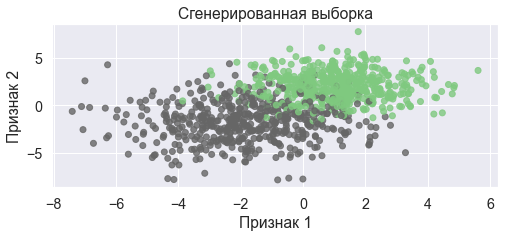

In [228]:
X, y = make_blobs(
    n_samples=(500, 500),  # количество точек в каждом кластере
    centers=[[1, 2], [-2, -2]],  # центры кластеров
    cluster_std=[1.5, 2],  # стандартные отклонения по кластерам
    random_state=42  # зерно случайности
)

plt.figure(figsize=(8, 3))  # создаем фигуру
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap='Accent')  # рисуем точки
plt.grid()  # добавление сетки на график
plt.xlabel('Признак 1'), plt.ylabel('Признак 2')
plt.title('Сгенерированная выборка')
plt.show()  # печатаем график

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((850, 2), (150, 2), (850,), (150,))

In [230]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [231]:
print(f'accuracy: {accuracy_score(y_test, model.predict(X_test)) :.3}')


accuracy: 0.913


In [232]:
def generate_grid(train_sample, border=1.0, step=0.05):
    '''
    Генерация сетки для вычисления предсказаний.
    
    :param train_sample: (np.ndarray)
        Точки выборки, по которым строилась модель
    :param border: (float)
        Отступ от максимальных и минимальных значений выборки по обеим координатам
    :param step: (float)
        Шаг сетки
    '''
    
    return np.meshgrid(
        np.arange(min(train_sample[:, 0]) - border, 
                  max(train_sample[:, 0]) + border, 
                  step),
        np.arange(min(train_sample[:, 1]) - border, 
                  max(train_sample[:, 1]) + border, 
                  step)
    )

In [233]:
def create_picture(X_train, y_train, model, border=1.0, 
                   step=0.05, figsize=(18, 5), 
                   cmap='winter', alpha=1):
    '''
    Визуализация предсказаний классов на плоскости и точек обучающей выборки.
    
    :param X_train:
        Точки обучающей выборки
    :param y_train:
        Классы точек обучающей выборки
    :param model:
        Модель-классификатор, для которой визуализируются предсказания
    '''
    
    # == Создание сетки ==
    grid = generate_grid(X_train, border, step)
    # Выворачивание сетки для приведения к форме выборки
    grid_ravel = np.c_[grid[0].ravel(), grid[1].ravel()]
    
    # == Предсказание значений для сетки == 
    # Берем вероятности для первого класса
    grid_predicted_ravel = model.predict_proba(grid_ravel)[:, 1]
    # Подгоняем размер
    grid_predicted = grid_predicted_ravel.reshape(grid[0].shape)
    
    
    # == Построение фигуры ==
    plt.figure(figsize=figsize)
    
    # Визуализируем саму классификацию на левом графике
    plt.subplot(1, 2, 1)
    plt.pcolormesh(grid[0], grid[1], grid_predicted > 0.5, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                alpha=alpha, cmap=cmap, edgecolor='black')
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Классификация {}-NN'.format(model.get_params()['n_neighbors']))
    
    # Визуализируем вероятности классов на правом графике
    plt.subplot(1, 2, 2)
    plt.pcolormesh(grid[0], grid[1], grid_predicted, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                alpha=alpha, cmap=cmap, edgecolor='black')
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Вероятности {}-NN'.format(model.get_params()['n_neighbors']))
    
    plt.show()

### Евклидова метрика.
$$\mathrm{EuclideanDistance}(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

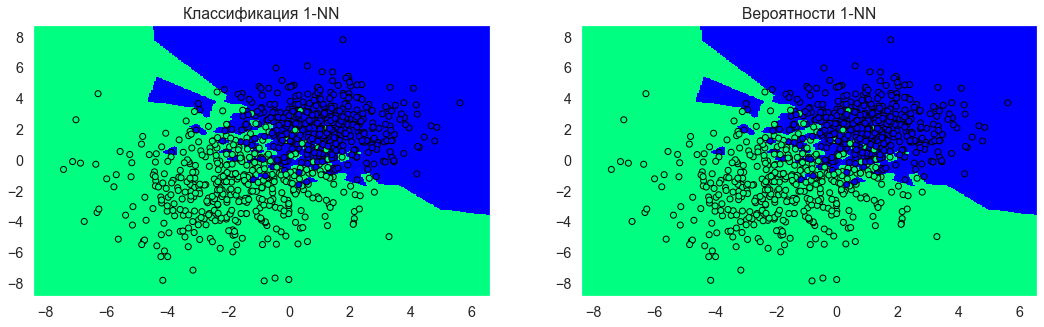

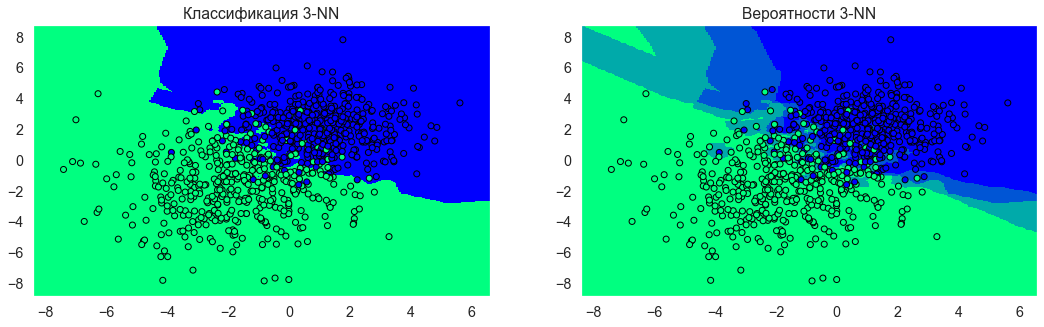

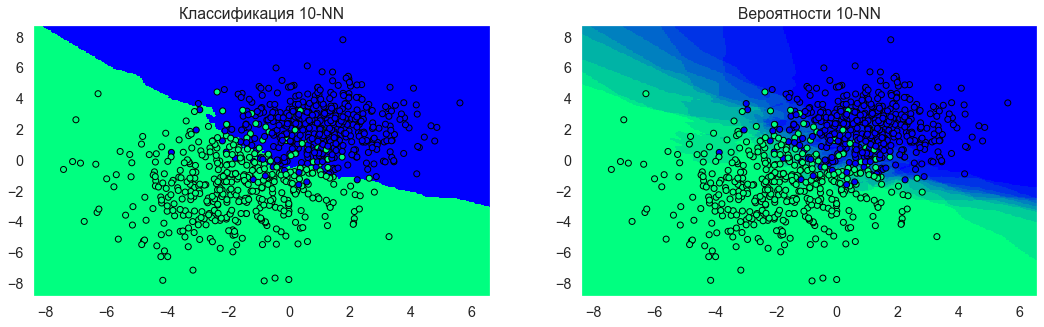

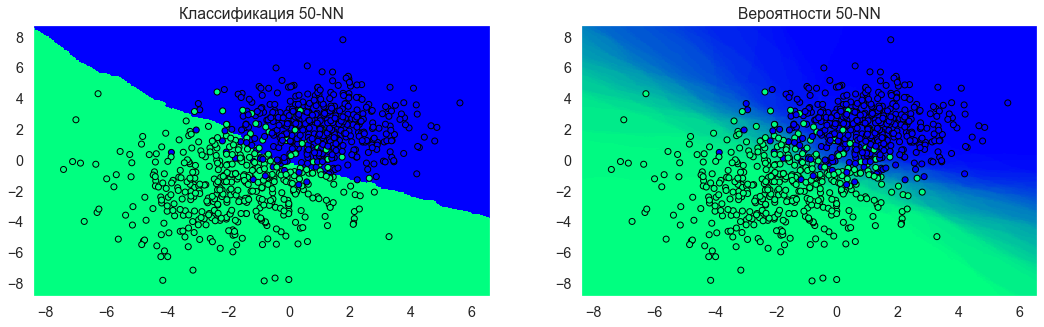

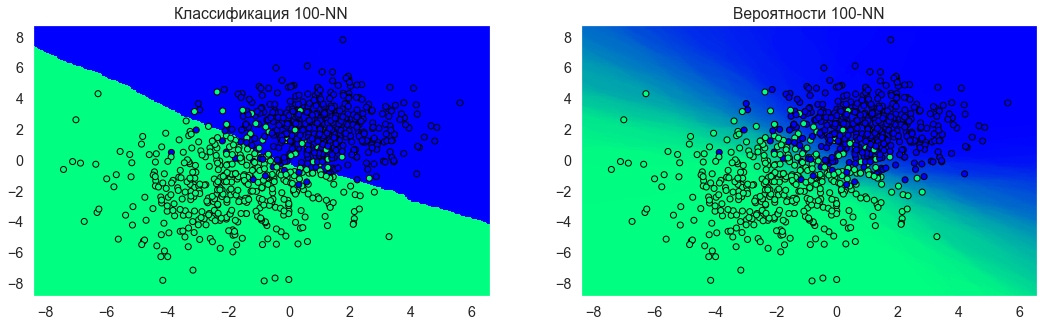

In [234]:
for n_neighbors in [1, 3, 10, 50,100]:
    create_picture(
        X_train, 
        y_train, 
        KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    )
    m = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    y_pred = m.predict(X_test)
    

### Теперь построим аналогичные графики для манхэттенской метрики
$$\text{ManhattanDistance}(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|$$

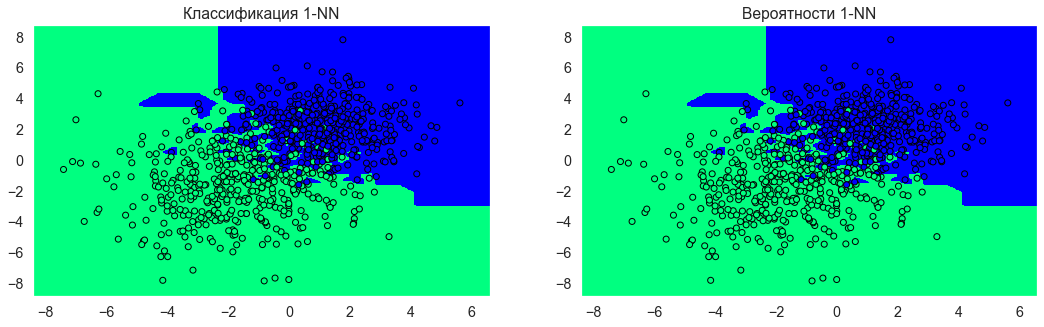

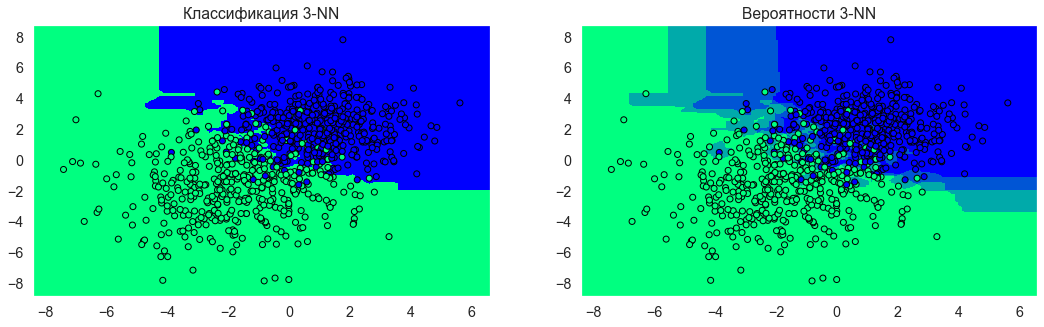

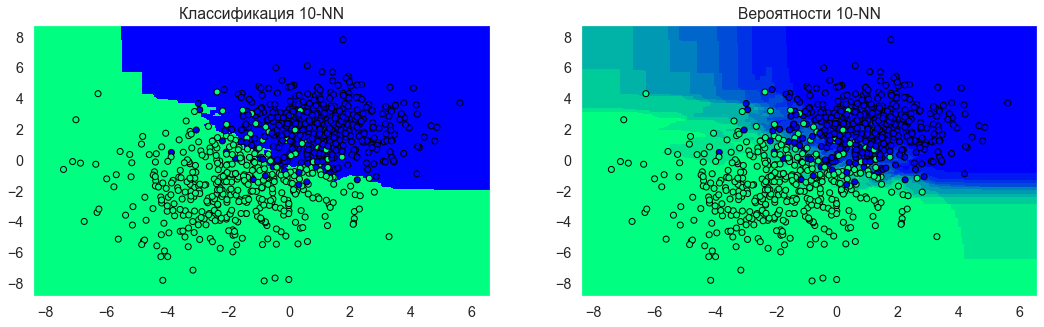

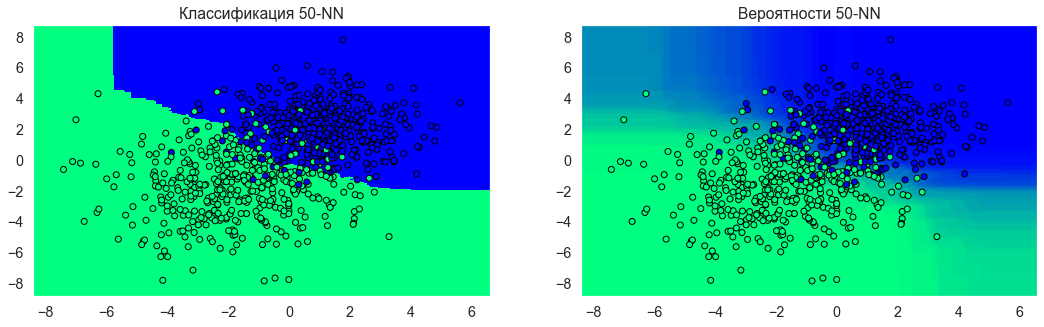

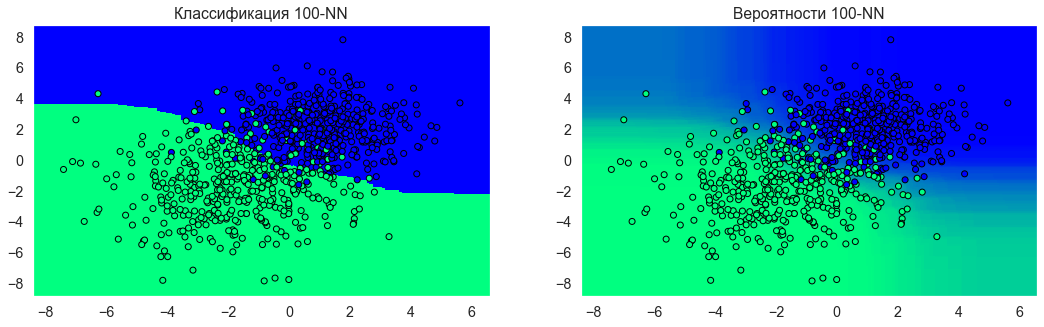

In [235]:
for n_neighbors in [1, 3, 10, 50, 100]:
    create_picture(
        X_train, 
        y_train, 
        KNeighborsClassifier(n_neighbors=n_neighbors, p=1).fit(X_train, y_train)
    )

In [236]:
m = KNeighborsClassifier(n_neighbors=3,p=1).fit(X_train, y_train)
y_pred = m.predict(X_test)
print('Точность при манхетенской метрике %f' % accuracy_score(y_test, y_pred))

Точность при манхетенской метрике 0.913333


In [237]:
m = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = m.predict(X_test)
print('Точность при евклидовой метрике %f' % accuracy_score(y_test, y_pred))

Точность при евклидовой метрике 0.913333


### Вывод:

При увеличении числа соседей разделяющая кривая получается более гладкой. При маленьком же числе рассматриваемых соседей модель чувствительна к наложению классов, из-за чего в предсказаниях разделяющая поверхность очень неровная. Также при большом числе классов переход между классами на графике вероятностей намного более плавный.

        длина    высота
0   -0.457686 -2.181797
1   -0.457686 -2.181797
2   -0.253308 -0.652565
3    0.206541  0.154531
4    0.206541  0.154531
..        ...       ...
200  1.245459  0.664275
201  1.245459  0.664275
202  1.245459  0.664275
203  1.245459  0.664275
204  1.245459  0.664275

[185 rows x 2 columns]


<AxesSubplot:xlabel='length', ylabel='height'>

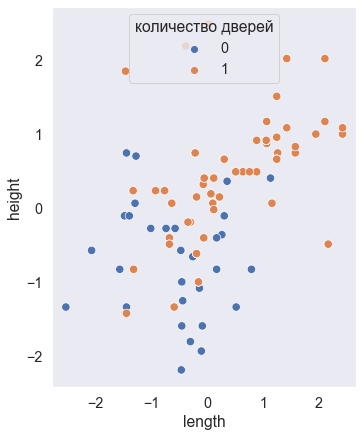

In [238]:
plt.figure(figsize=(12, 7))

col = ['длина', 'высота']
X = z_norm(df2[col])

# Создаем целевой столбец (y), преобразуя столбец "количество дверей" в числовой формат (0 или 1)
y = (df2['количество дверей'] == 'four').astype(int)

col = ['length', 'height']
X.columns = col




plt.subplot(121)
sns.scatterplot(
    data=X,  # из этой таблицы нарисовать точки
    x='length', y='height',  # с этими координатами,
    hue=y, # для которых цвет определить согласно этому столбцу
    s=70  # размер точек
)

### Реализация метода перекрестной проверки

In [239]:
from sklearn.model_selection import cross_val_score


def find_best_neighbors(X_train, y_train, neighbors_list,ps = 2):
    best_score = 0
    best_neighbors = None
    
    for n_neighbors in neighbors_list:
        model = KNeighborsClassifier(n_neighbors=n_neighbors,p = ps)
        scores = cross_val_score(model, X_train, y_train, cv=5) # Используем перекрестную проверку с 5 фолдами
        
        mean_score = scores.mean() # Средняя оценка производительности на всех фолдах
        
        if mean_score > best_score:
            best_score = mean_score
            best_neighbors = n_neighbors
    
    return best_neighbors

In [240]:
neighbors_list = [1, 3, 5, 7, 9]
neighbors = find_best_neighbors(X_train,y_train,neighbors_list)
print('Лучшее число соседей для евклидовой метрики %d' % neighbors)
model = KNeighborsClassifier(n_neighbors=neighbors)
model.fit(X_train, y_train)

Лучшее число соседей для евклидовой метрики 9


KNeighborsClassifier(n_neighbors=9)

In [241]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [242]:
print(f'accuracy для евклидовой метрики: {accuracy_score(y_test, y_pred) :.3}')


accuracy для евклидовой метрики: 0.933


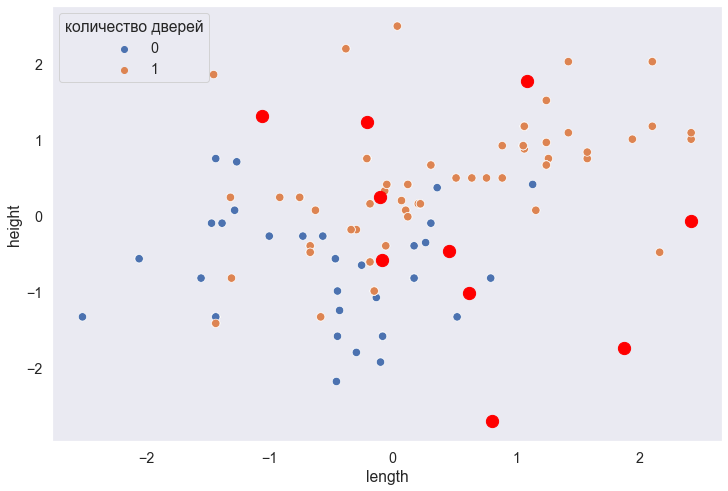

In [243]:
plt.figure(figsize = (12,8))
sns.scatterplot(
    data=X,  # из этой таблицы нарисовать точки
    x='length', y='height',  # с этими координатами,
    hue=y, # для которых цвет определить согласно этому столбцу
    s=70  # размер точек
)
plt.grid
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        # Преобразование X_test в DataFrame
        x_test_df = pd.DataFrame(X_test, columns=['длина', 'высота'])
        # Затем можно использовать метод iloc
        plt.scatter(x_test_df.iloc[i, 1], x_test_df.iloc[i, 0], color='red', s=150)

In [244]:
neighbors_list = [1, 3, 5, 7, 9]
neighbors = find_best_neighbors(X_train,y_train,neighbors_list,ps = 1)
print('Лучшее число соседей для манхэттенской метрики %d' % neighbors)
model = KNeighborsClassifier(n_neighbors=neighbors,p=1)
model.fit(X_train, y_train)

Лучшее число соседей для манхэттенской метрики 9


KNeighborsClassifier(n_neighbors=9, p=1)

In [245]:
y_pred = model.predict(X_test)

In [246]:
print(f'accuracy для манхэттенской метрики: {accuracy_score(y_test, y_pred) :.3}')

accuracy для манхэттенской метрики: 0.927


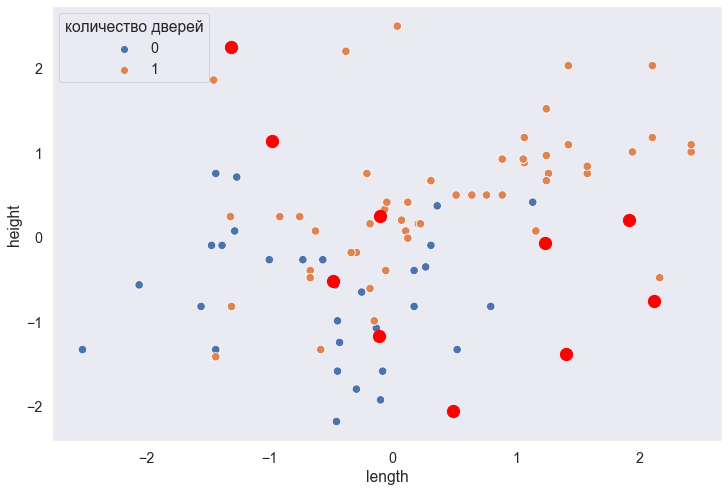

In [225]:
plt.figure(figsize = (12,8))
sns.scatterplot(
    data=X,  # из этой таблицы нарисовать точки
    x='length', y='height',  # с этими координатами,
    hue=y, # для которых цвет определить согласно этому столбцу
    s=70  # размер точек
)
plt.grid
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        # Преобразование X_test в DataFrame
        x_test_df = pd.DataFrame(X_test, columns=['длина', 'высота'])
        # Затем можно использовать метод iloc
        plt.scatter(x_test_df.iloc[i, 1], x_test_df.iloc[i, 0], color='red', s=150)

### Красным цветом обозначены точки, для которых классификация сработала неправильно.

